In [1]:
import numpy as np
import scipy as sp

from scipy.integrate import solve_ivp

import matplotlib
from matplotlib import pyplot as pl

We solve the Bloch equations $ \partial_t \mathbf S = M \mathbf S - \mathbf R $ for the vector $\mathbf S \equiv (\sigma_-, \sigma_+, \sigma_z)^T$, where the matrix $M$ is defined as

In [2]:
def M_mat(Omega, delta, Gamma):
    mat = np.zeros((3,3), dtype = complex)
    mat[0,0] = -1j*delta - Gamma/2
    mat[0,2] = 1j*Omega/2
    mat[1,1] = 1j*delta - Gamma/2
    mat[1,2] = -1j*np.conjugate(Omega)/2
    mat[2,0] = 1j*np.conjugate(Omega)
    mat[2,1] = -1j*Omega
    mat[2,2] = -Gamma
    return mat

In [3]:
# The right-hand side of Bloch equations

def Bloch_eqs(t, S, Mval, Gamma):
    R = np.array([1j*0.,1j*0.,Gamma])
    return np.dot(Mval,S) - R

In [4]:
# Saturation parameter
def saturation(Omega, delta, Gamma):
    s = (2*Omega**2/Gamma**2)/(1 + 4*delta**2/Gamma**2)
    return s

In [5]:
Gamma = 1.
delta = 0.
Omega = 4.
t_start = 0.
t_stop = 10.
t_list = np.linspace(0,10,300)

In [6]:
print('The saturation parameter is s =', saturation(Omega, delta, Gamma))

The saturation parameter is s = 32.0


In [7]:
M = M_mat(Omega,delta,Gamma)

In [8]:
# Initial state in the ground state
S0 = np.array([1j*0.,1j*0.,-1])

Optical Bloch's equation are first-order ordinary differential equations. We can solve them using a numerical integrator, which adopts for example a Runge-Kutta method.

In [9]:
sol=solve_ivp(Bloch_eqs, t_span=(0, 10), y0 = S0, args=(M,Gamma), t_eval = t_list)

In [10]:
# We extract the times at which the function has evaluated the dynamics. 
# Note: we forced these times to be chosen as t_list
times = sol.t

In [11]:
# Solution at all times 
St = sol.y

In [12]:
sz = St[2]

The probability of finding the atom in the excited state is $P_e(t) = \frac 1 2 (1 + \langle \sigma_z \rangle)$

In [13]:
# Probability of finding the atom in the excited state
Pe = 0.5*(1+np.real(sz))

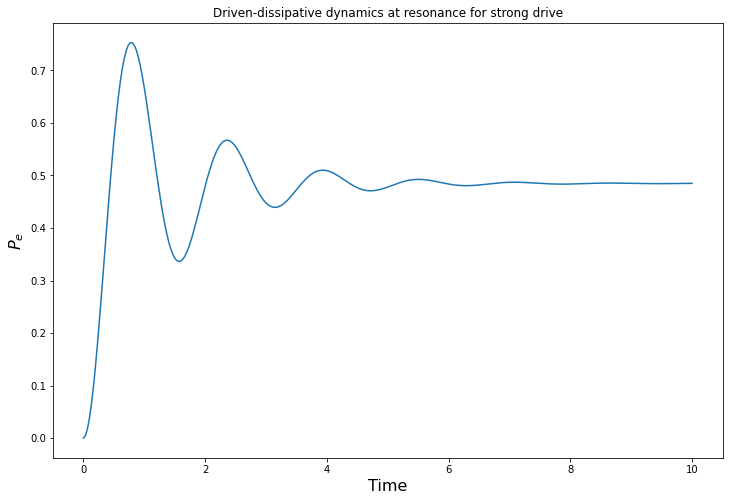

In [14]:
pl.figure(figsize=(12,8))
pl.plot(sol.t,Pe)
pl.xlabel('Time', fontsize=16)
pl.ylabel('$P_e$', fontsize=16)
pl.title('Driven-dissipative dynamics at resonance for strong drive')
pl.show()

Let us look for the linediwth of the transition (the resonance). We then scan in detuning $\delta/\Gamma$:

In [15]:
delta_list = np.linspace(-15,15,200)

We collect at large times ($t \rightarrow \infty$) the value for the probability of having the atom excited

In [16]:
S0 = np.array([1j*0.,0.,-1])
Pe_list = []
for delta in delta_list:
    M = M_mat(Omega,delta,Gamma)
    sol=solve_ivp(Bloch_eqs, t_span=(0, 10), y0 = S0, args=(M,Gamma), t_eval = t_list)
    St = sol.y
    sz_final = St[2][-1]
    Pe_final = 0.5*(1+np.real(sz_final))
    Pe_list.append(Pe_final)

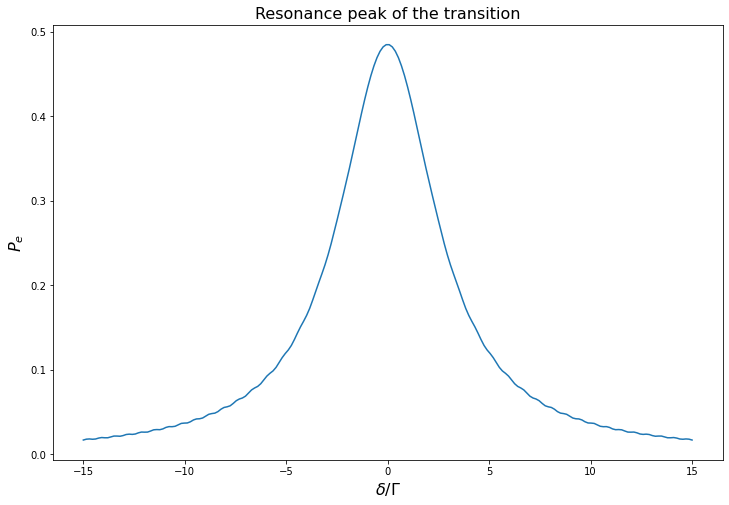

In [17]:
pl.figure(figsize=(12,8))
pl.plot(delta_list,Pe_list)
pl.xlabel('$\delta/\Gamma$', fontsize=16)
pl.ylabel('$P_e$', fontsize=16)
pl.title('Resonance peak of the transition', fontsize=16)
pl.show()

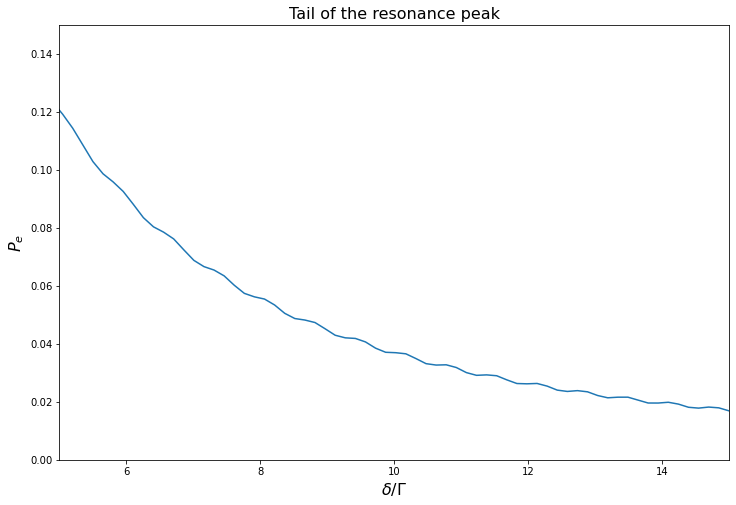

In [18]:
pl.figure(figsize=(12,8))
pl.plot(delta_list,Pe_list)
pl.xlim([5,15])
pl.ylim([0,0.15])
pl.xlabel('$\delta/\Gamma$', fontsize=16)
pl.ylabel('$P_e$', fontsize=16)
pl.title('Tail of the resonance peak', fontsize=16)
pl.show()

Why are there oscillations and how can we 'fix' this problem?